In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import sqrt

**Reading the data required**

In [2]:
dailyData = pd.read_csv("../../dataset/dailyData.csv", infer_datetime_format = True, parse_dates = ['DateTime'], index_col = ['DateTime'])
weeklyData = pd.read_csv("../../dataset/weeklyData.csv", infer_datetime_format = True, parse_dates = ['DateTime'], index_col = ['DateTime'])
monthlyData = pd.read_csv("../../dataset/monthlyData.csv", infer_datetime_format = True, parse_dates = ['DateTime'], index_col = ['DateTime'])

**SARIMA model for prediction on Daily basis**

In [3]:
dailyGAP = dailyData['Global_active_power']
dailyGAP_train = dailyGAP['2006-12-17':'2010-01-02']
dailyGAP_diff = dailyGAP_train.diff()['2006-12-18':]
dailyGAP_diff.head()

DateTime
2006-12-18   -1186.634
2006-12-19    -537.632
2006-12-20     559.554
2006-12-21    -508.634
2006-12-22     624.224
Name: Global_active_power, dtype: float64

**Performing the Augmented Dickey fuller test**

In [4]:
#Performing Augmented Dickey fuller test
X = dailyGAP_diff.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The series is stationary the result is statistically significant

ADF Statistic: -11.834837
p-value: 0.000000


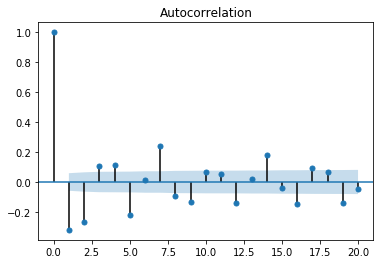

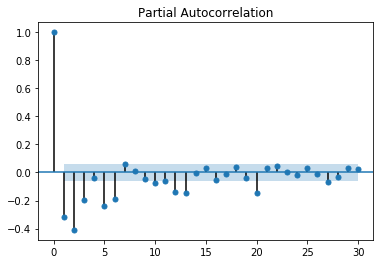

In [5]:
dailyACF = plot_acf(dailyGAP_diff, lags = 20)
dailyPACF = plot_pacf(dailyGAP_diff, lags = 30)


In [6]:
# Predicting on a daily basis
# Trying to find the best parameters

p = range(3,8)
q = range(2,4)
season_duration = 7
sp = range(1,3)
sd = range(1)
seasonalps = [(x[0], x[1], 0, season_duration) for x in list(itertools.product(sp,sd))]
param = [(x[0], 1, x[1]) for x in list(itertools.product(p,q))]

for pdq in param:
    for param_seasonal in seasonalps:
        mod = sm.tsa.statespace.SARIMAX(dailyGAP_train,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

        results = mod.fit()
        rmse = sqrt(mean_squared_error(results.fittedvalues, dailyGAP_train))
        print('ARIMA{}x{} - AIC:{} -RMSE:{}'.format(pdq, param_seasonal, results.aic, rmse))

c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(3, 1, 2)x(1, 0, 0, 7) - AIC:16591.073560554752 -RMSE:481.81075934258564


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(3, 1, 2)x(2, 0, 0, 7) - AIC:16446.705783673442 -RMSE:481.09316082958713


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(3, 1, 3)x(1, 0, 0, 7) - AIC:16519.436731458234 -RMSE:460.59198100281776


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(3, 1, 3)x(2, 0, 0, 7) - AIC:16371.423141452655 -RMSE:458.90738711400917


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 2)x(1, 0, 0, 7) - AIC:16556.573266784544 -RMSE:476.9014319557182


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(2, 0, 0, 7) - AIC:16374.27026680435 -RMSE:470.30134180102124


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 3)x(1, 0, 0, 7) - AIC:16506.888006813762 -RMSE:463.3138687752428


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 3)x(2, 0, 0, 7) - AIC:16357.181426526698 -RMSE:459.89958093844393


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(5, 1, 2)x(1, 0, 0, 7) - AIC:16509.853036688255 -RMSE:468.58070787224


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 2)x(2, 0, 0, 7) - AIC:16383.012957562725 -RMSE:485.7165121589172


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(5, 1, 3)x(1, 0, 0, 7) - AIC:16492.212076437732 -RMSE:463.8856524634535


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 3)x(2, 0, 0, 7) - AIC:16342.399455141873 -RMSE:460.2447683829866


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(6, 1, 2)x(1, 0, 0, 7) - AIC:16495.698456809092 -RMSE:468.94655844631217


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(6, 1, 2)x(2, 0, 0, 7) - AIC:16345.250243531418 -RMSE:470.4668568279962


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3)x(1, 0, 0, 7) - AIC:16487.035403854636 -RMSE:460.1161180119238


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3)x(2, 0, 0, 7) - AIC:16312.297596388042 -RMSE:448.0520206929119


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(7, 1, 2)x(1, 0, 0, 7) - AIC:16462.4693865366 -RMSE:467.97474322715624


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(7, 1, 2)x(2, 0, 0, 7) - AIC:16321.268647182304 -RMSE:492.7448568134656


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 3)x(1, 0, 0, 7) - AIC:16424.275547686015 -RMSE:461.63266767607155


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 3)x(2, 0, 0, 7) - AIC:16286.0582112328 -RMSE:449.4734821061319


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1320      0.032     -4.125      0.000      -0.195      -0.069
ar.L2         -0.7979      0.039    -20.693      0.000      -0.873      -0.722
ar.L3          0.3345      0.035      9.689      0.000       0.267       0.402
ar.L4          0.0418      0.034      1.215      0.224      -0.026       0.109
ma.L1         -0.4545      0.021    -21.500      0.000      -0.496      -0.413
ma.L2          0.5349      0.022     24.014      0.000       0.491       0.579
ma.L3         -0.8665      0.022    -40.300      0.000      -0.909      -0.824
ar.S.L7        0.0921      0.031      3.000      0.003       0.032       0.152
ar.S.L14       0.0290      0.028      1.054      0.292      -0.025       0.083
sigma2      1.965e+05   6849.771     28.682      0.000    1.83e+05     2.1e+05
ARIMA[4, 1, 3]x[2, 0, 0, 7] - AIC:16357.181426526698

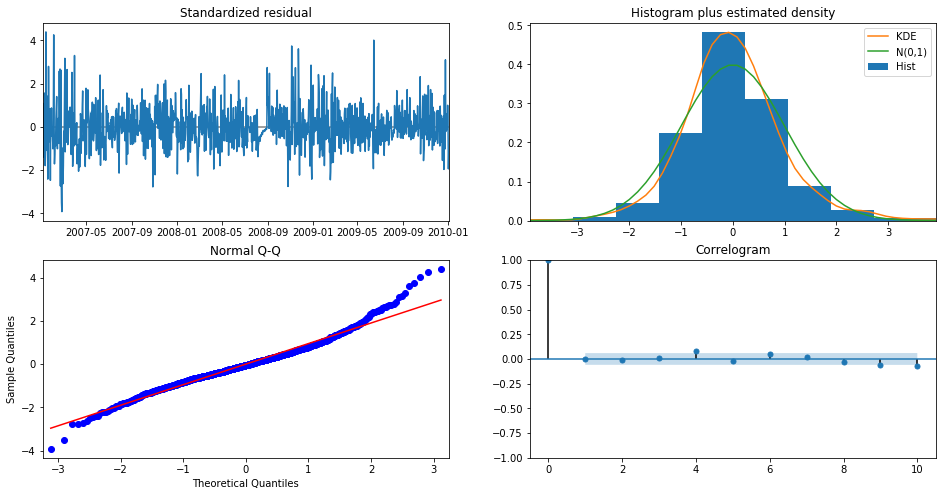

In [7]:
param_seasonal = [2,0,0,7]
pdq = [4,1,3]

mod = sm.tsa.statespace.SARIMAX(dailyGAP_train,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])
rmse = sqrt(mean_squared_error(results.fittedvalues, dailyGAP_train))
print('ARIMA{}x{} - AIC:{} -RMSE:{}'.format(pdq, param_seasonal, results.aic, rmse))
results.plot_diagnostics(figsize=(16,8))
plt.show()

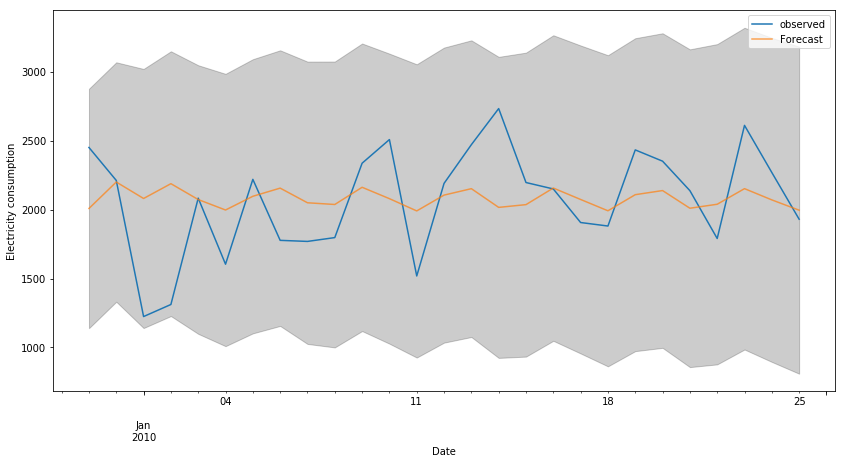

RMSE:373.0852954670784


In [8]:
start_date = '2009-12-30'
end_date = '2010-01-25'

pred = results.get_prediction(start = start_date, end = end_date, dynamic=1)
pred_ci = pred.conf_int()

ax = dailyGAP[start_date:end_date].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity consumption')
plt.legend()

plt.show()

rmse = sqrt(mean_squared_error(pred.predicted_mean, dailyGAP[start_date:end_date].values))
print('RMSE:{}'.format(rmse))

**SARIMA model for prediction on weekly basis**

In [9]:
weeklyGAP = weeklyData['Global_active_power']
weeklyGAP_train = weeklyGAP['2006-12-17':'2010-01-02']
weeklyGAP_diff = weeklyGAP_train.diff()[1:]
weeklyGAP_train.tail()

DateTime
2009-11-29    12069.672
2009-12-06    13768.268
2009-12-13    13350.698
2009-12-20    11940.240
2009-12-27    14790.800
Name: Global_active_power, dtype: float64

In [10]:
#Performing Augmented Dickey fuller test
X = weeklyGAP_train.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The series is stationary the result is statistically significant

ADF Statistic: -3.686369
p-value: 0.004309


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


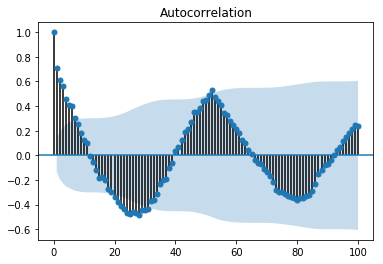

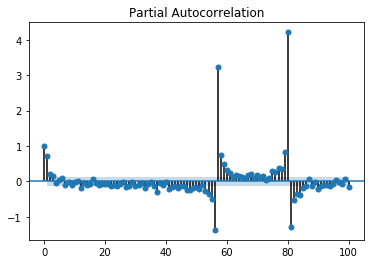

In [11]:
weeklyACF = plot_acf(weeklyGAP, lags = 100)
weeklyPACF = plot_pacf(weeklyGAP, lags = 100)


In [12]:
# Predicting on a weekly basis
# Trying to find the best parameters

p = range(3)
q = range(0,2)
season_duration = 52    # As attained from the analysis
sp = range(1,2)
sq = range(2)
seasonalps = [(x[0], 0, x[1], season_duration) for x in list(itertools.product(sp,sq))]
param = [(x[0], 0, x[1]) for x in list(itertools.product(p,q))]

for pdq in param:
    for param_seasonal in seasonalps:
        mod = sm.tsa.statespace.SARIMAX(weeklyGAP_train,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
        results = mod.fit()
        rmse = sqrt(mean_squared_error(results.fittedvalues, weeklyGAP_train))
        print('ARIMA{}x{} - AIC:{} -RMSE:{}'.format(pdq, param_seasonal, results.aic, rmse))

c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:1987.0834911905563 -RMSE:7003.319267743751


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 52) - AIC:1954.4696457636921 -RMSE:7002.000574479623


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:1972.2385610121225 -RMSE:5713.124867835318


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 52) - AIC:1926.1149824934325 -RMSE:5853.705706011084


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 52) - AIC:1911.5468658858906 -RMSE:2502.37238880643


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 52) - AIC:1913.3004554217434 -RMSE:2502.3558375694674


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 52) - AIC:1905.924793572199 -RMSE:2393.5632696626544


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 52) - AIC:1888.8057619106685 -RMSE:2398.848154228658


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(1, 0, 0, 52) - AIC:1890.6531940304305 -RMSE:2478.7511414881865


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0)x(1, 0, 1, 52) - AIC:1892.6345646474078 -RMSE:2478.6347889706385


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(1, 0, 0, 52) - AIC:1888.7282156326696 -RMSE:2377.935993220105


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x(1, 0, 1, 52) - AIC:1890.727973901713 -RMSE:2378.1105275142663


**Model Diagnostics**

c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0914      0.281      3.881      0.000       0.540       1.643
ar.L2         -0.1015      0.275     -0.369      0.712      -0.641       0.438
ma.L1         -0.4990      0.253     -1.976      0.048      -0.994      -0.004
ar.S.L52       0.3100      0.071      4.353      0.000       0.170       0.450
sigma2      4.661e+06   1.13e-07   4.12e+13      0.000    4.66e+06    4.66e+06
ARIMA[2, 0, 1]x[1, 0, 0, 52] - AIC:1888.7282156326696 -RMSE:2377.935993220105


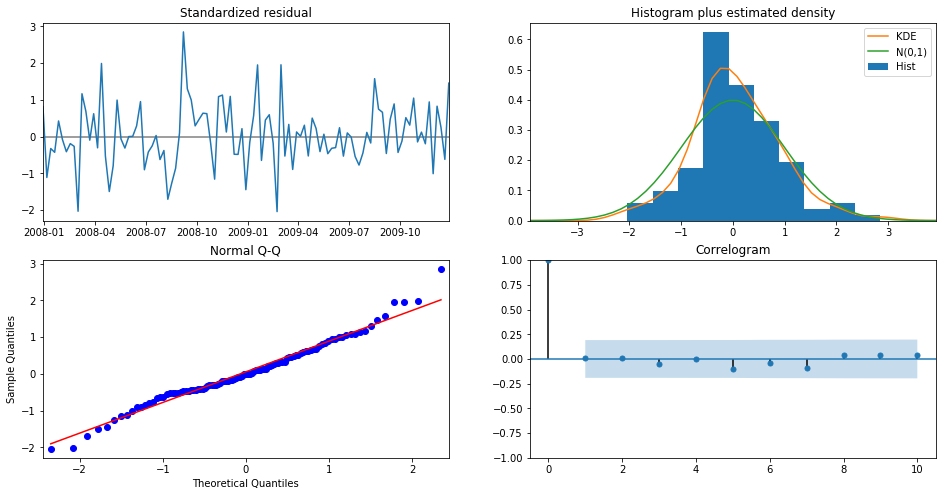

In [13]:
param_seasonal = [1,0,0,52]
pdq = [2,0,1]

mod = sm.tsa.statespace.SARIMAX(weeklyGAP_train,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])
rmse = sqrt(mean_squared_error(results.fittedvalues, weeklyGAP_train))
print('ARIMA{}x{} - AIC:{} -RMSE:{}'.format(pdq, param_seasonal, results.aic, rmse))
results.plot_diagnostics(figsize=(16,8))
plt.show()

**Forecast using the current model**

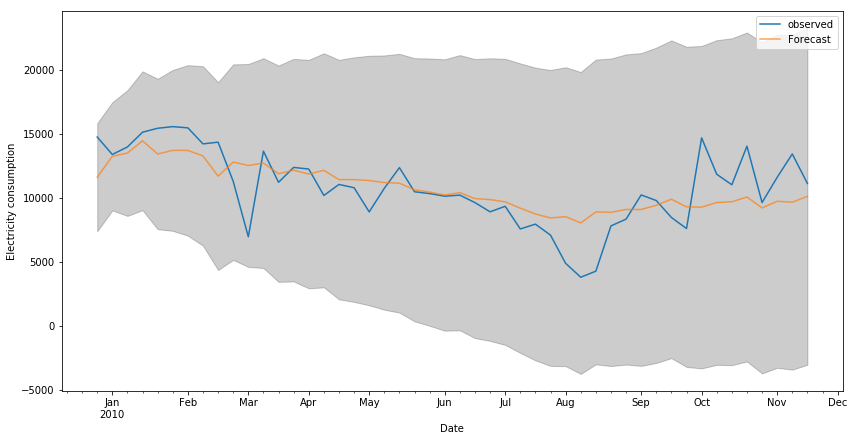

RMSE:2112.5225019646987


In [14]:
start_date = '2009-12-27'
end_date = '2010-11-21'

pred = results.get_prediction(start = start_date, end = end_date, dynamic=1)
pred_ci = pred.conf_int()

ax = weeklyGAP[start_date:end_date].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity consumption')
plt.legend()

plt.show()

rmse = sqrt(mean_squared_error(pred.predicted_mean, weeklyGAP[start_date:end_date].values))
print('RMSE:{}'.format(rmse))

**SARIMA model for prediction on Monthly basis**

In [15]:
monthlyGAP = monthlyData['Global_active_power']
monthlyGAP_train = monthlyGAP[:'2009']
monthlyGAP.head()

DateTime
2006-12-31    41826.806
2007-01-31    69017.230
2007-02-28    56496.828
2007-03-31    58862.574
2007-04-30    36529.322
Name: Global_active_power, dtype: float64

In [16]:
#Performing Augmented Dickey fuller test
X = monthlyGAP.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The series is stationary the result is statistically significant

ADF Statistic: -5.290767
p-value: 0.000006


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


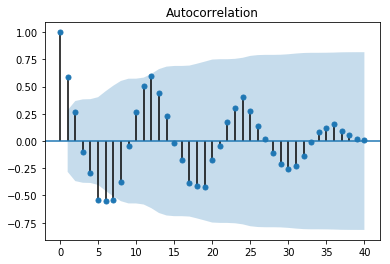

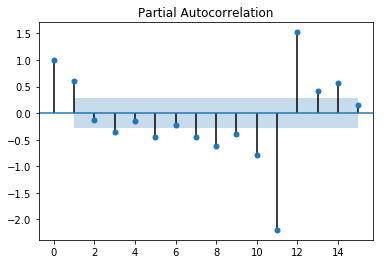

In [17]:
monthlyACF = plot_acf(monthlyGAP, lags = 40)
monthlyPACF = plot_pacf(monthlyGAP, lags = 15)


In [18]:
# Predicting on a monthly basis
# Trying to find the best parameters

season_duration = 12
p = q = range(3)
param_seasonal = [1,0,0,season_duration]
param = [(x[0], 0, x[1]) for x in list(itertools.product(p,q))]


newMonthGAP = monthlyGAP_train['2007':]

for pdq in param:
    mod = sm.tsa.statespace.SARIMAX(newMonthGAP,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()

    #print(results.summary().tables[1])
    rmse = sqrt(mean_squared_error(results.fittedvalues, newMonthGAP))
    print('ARIMA{}x{} - AIC:{} -RMSE:{}'.format(pdq, param_seasonal, results.aic, rmse))

c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x[1, 0, 0, 12] - AIC:501.23479679124557 -RMSE:29815.129834637635
ARIMA(0, 0, 1)x[1, 0, 0, 12] - AIC:567.5989046243882 -RMSE:31093.811774304235
ARIMA(0, 0, 2)x[1, 0, 0, 12] - AIC:569.9990039407315 -RMSE:31391.178683303744
ARIMA(1, 0, 0)x[1, 0, 0, 12] - AIC:486.9816396106418 -RMSE:33308.47047377337


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x[1, 0, 0, 12] - AIC:487.59314290251575 -RMSE:36080.26993227244


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x[1, 0, 0, 12] - AIC:489.2628127662621 -RMSE:36005.27611430206
ARIMA(2, 0, 0)x[1, 0, 0, 12] - AIC:472.1958324645509 -RMSE:16634.531919769423


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1)x[1, 0, 0, 12] - AIC:483.25545940012677 -RMSE:55987.38456624282


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2)x[1, 0, 0, 12] - AIC:468.1205796104029 -RMSE:44771.93660753356


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5895      0.223      2.642      0.008       0.152       1.027
ar.L2          0.3684      0.196      1.876      0.061      -0.016       0.753
ar.S.L12       0.5433      0.240      2.266      0.023       0.073       1.013
sigma2       1.14e+08   2.22e-10   5.13e+17      0.000    1.14e+08    1.14e+08


c:\users\mimos\anaconda3\envs\tf_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


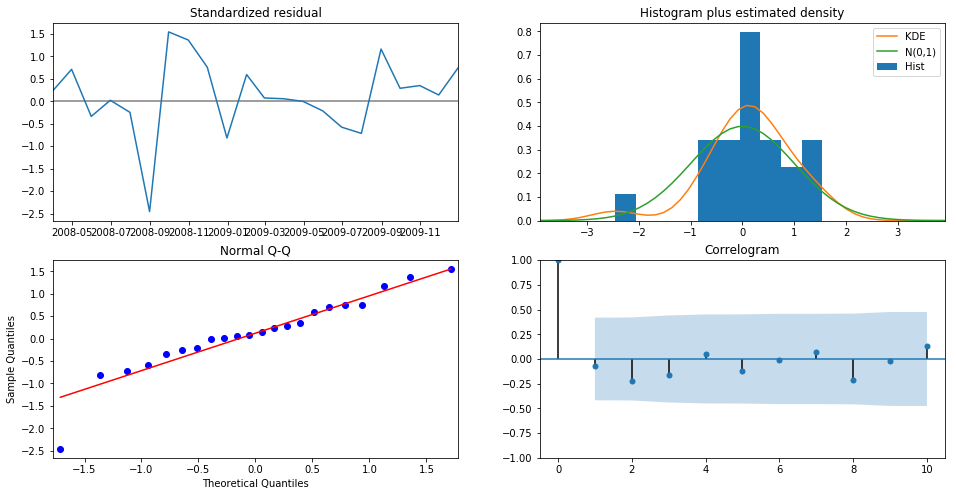

In [19]:
pdq = [2,0,0]
season_duration = 12
param_seasonal = [1,0,0,season_duration]

mod = sm.tsa.statespace.SARIMAX(newMonthGAP,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16,8))
plt.show()

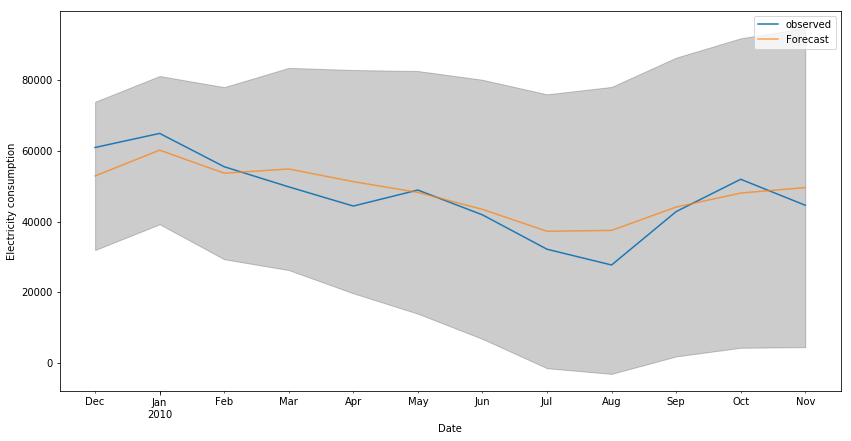

RMSE:5233.018483518366


In [20]:
start_date = '2009-12-31'
end_date = '2010-11-30'

pred = results.get_prediction(start = start_date, end = end_date, dynamic=1)
pred_ci = pred.conf_int()

ax = monthlyGAP[start_date:end_date].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity consumption')
plt.legend()

plt.show()

rmse = sqrt(mean_squared_error(pred.predicted_mean, monthlyGAP[start_date:end_date].values))
print('RMSE:{}'.format(rmse))